<a href="https://colab.research.google.com/github/ArmstrongVo/ArmstrongVo.github.io/blob/main/AI_W3_ANFIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-24-ad02cb0144bc>:54: UserWarning: The following kwargs were not used by contour: 'Zdir', 'anpha'
  cset = ax.contourf(x,y,z,Zdir='z',offset =9,cmap ='viridis',anpha =0.5)
<ipython-input-24-ad02cb0144bc>:55: UserWarning: The following kwargs were not used by contour: 'Zdir', 'anpha'
  cset = ax.contourf(x,y,z,Zdir='x',offset =11,cmap ='viridis',anpha =0.5)
<ipython-input-24-ad02cb0144bc>:56: UserWarning: The following kwargs were not used by contour: 'Zdir', 'anpha'
  cset = ax.contourf(x,y,z,Zdir='y',offset =11,cmap ='viridis',anpha =0.5)


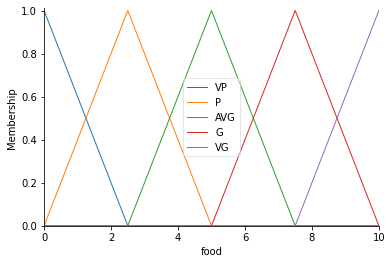

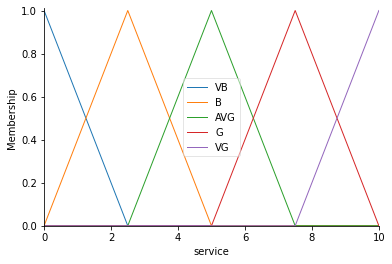

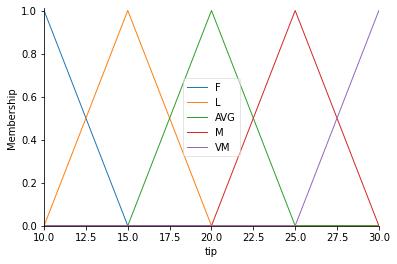

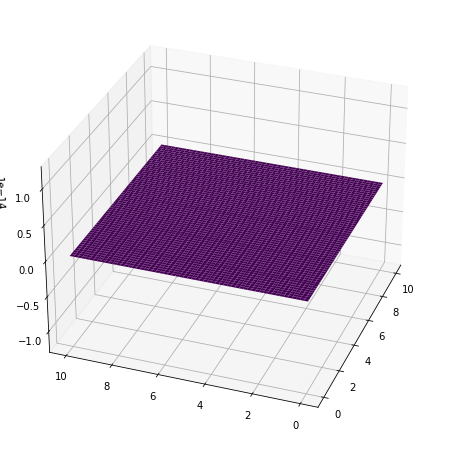

In [ ]:
from matplotlib import figure
from skfuzzy.membership.generatemf import gaussmf
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d

universe0 = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe0,'food')
service = ctrl.Antecedent(universe0,'service')
tip = ctrl.Consequent(universe1,'tip')

namefood = ['VP','P','AVG','G','VG']
nameservice = ['VB','B','AVG','G','VG']
nametip = ['F','L','AVG','M','VM']
food.automf(names = namefood)
service.automf(names = nameservice)
tip.automf(names = nametip)

food.view()
service.view()
tip.view()

rule0 = ctrl.Rule(antecedent=((food['VP']&service['VB'])|(food['P']&service['VB'])|(food['VP']&service['B'])),consequent=tip['F'],label='rule FEW')
rule1 = ctrl.Rule(antecedent=((food['AVG']&service['VB'])|(food['AVG']&service['B'])|
                              (food['G']&service['VB'])|(food['VP']&service['AVG'])|
                              (food['P']&service['AVG'])|(food['VP']&service['G'])),
                              consequent=tip['L'],label='rule LITTLE')
rule2 = ctrl.Rule(antecedent=((food['VG']&service['VB'])|(food['G']&service['B'])|
                              (food['VG']&service['B'])|(food['AVG']&service['AVG'])|
                              (food['G']&service['AVG'])|(food['P']&service['G'])|
                              (food['AVG']&service['G'])|(food['VP']&service['VG'])|
                              (food['P']&service['VG'])),
                              consequent=tip['AVG'],label='rule AVG')
rule3 = ctrl.Rule(antecedent=((food['VG']&service['AVG'])|(food['G']&service['G'])|(food['AVG']&service['VG'])),consequent=tip['M'],label='rule MUCH')
rule4 = ctrl.Rule(antecedent=((food['VG']&service['G'])|(food['G']&service['VG'])|(food['VG']&service['VG'])),consequent=tip['VM'],label='rule VERY MUCH')
system =ctrl.ControlSystem(rules=[rule0,rule1,rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run=61*61+1)
upsampled = np.linspace(0,10,61)
x,y =np.meshgrid(upsampled,upsampled)
z = np.zeros_like(x)
for i in range (61):
  for j in range (61):
    sim.input['food']=x[i,j]
    sim.input['service']=y[i,j]
    sim.compute
    sim.output['tip']=z[i,j]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot (111,projection= '3d')
suf = ax.plot_surface(x,y,z,rstride=1,cstride=1,cmap='viridis',antialiased=True,linewidth=0.4)
cset = ax.contourf(x,y,z,Zdir='z',offset =9,cmap ='viridis',anpha =0.5)
cset = ax.contourf(x,y,z,Zdir='x',offset =11,cmap ='viridis',anpha =0.5)
cset = ax.contourf(x,y,z,Zdir='y',offset =11,cmap ='viridis',anpha =0.5)
ax.view_init(30,200)





